In [1]:
import datetime
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

pd.options.display.max_colwidth = 30
pd.options.display.float_format = '{:,.3f}'.format

## Movies

In [2]:
movies = pd.read_csv('data/ml-20m/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [3]:
movies.columns = ['movie_id', 'title', 'genres']

In [4]:
movies.sample(10)

,movie_id,title,genres
1877,1961,Rain Man (1988),Drama
25233,119051,Crime at the Chinese Resta...,Comedy|Mystery|Thriller
9187,27074,Brave New World (1998),Sci-Fi
22618,108332,Mystery of the Yellow Room...,Comedy|Crime|Mystery
25252,119139,Ascension (2014),Drama|Sci-Fi
25382,119948,Let's Kill Ward's Wife (2014),Comedy
23159,110366,Jean-Michel Basquiat: The ...,Documentary
6017,6116,"Pirate Movie, The (1982)",Adventure|Comedy|Musical
24133,114417,"Average Little Man, An (Un...",Drama
7139,7251,Where the Day Takes You (1...,Drama


In [5]:
year_pattern = re.compile(r'.*\((\d+)\)')
def parse_year(title):
    try:
        return int(year_pattern.match(title).group(1))
    except:
        return None
movies['year'] = movies.title.apply(parse_year)

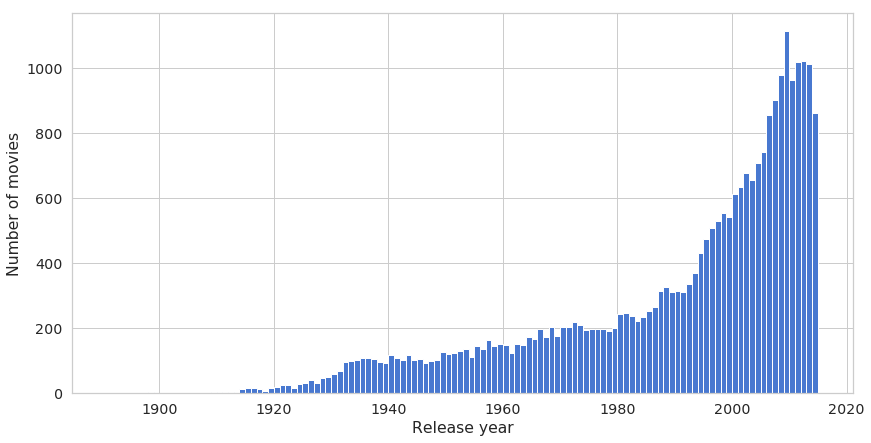

In [6]:
plt.figure(figsize=(14, 7))
years = movies.year.dropna().tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins)
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

In [7]:
all_genres = set()
def parse_genres(genres):
    ret = []
    for genre in genres.split('|'):
        genre = re.sub('[^a-z]', '', genre.lower())
        ret.append(genre)
        all_genres.add(genre)
    return ret
movies['parsed_genres'] = movies.genres.apply(parse_genres)
del movies['genres']
for genre in all_genres:
    movies['genre_{0}'.format(genre)] = movies.parsed_genres.apply(lambda genres: int(genre in genres))

In [8]:
movies.sum()

movie_id                                   1632737799
title                   Toy Story (1995)Jumanji (1...
year                                   54,222,311.000
parsed_genres           [adventure, animation, chi...
genre_comedy                                     8374
genre_action                                     3520
genre_children                                   1139
genre_horror                                     2611
genre_musical                                    1036
genre_fantasy                                    1412
genre_scifi                                      1743
genre_adventure                                  2329
genre_crime                                      2939
genre_drama                                     13344
genre_thriller                                   4178
genre_mystery                                    1514
genre_western                                     676
genre_documentary                                2471
genre_war                   

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 24 columns):
movie_id                27278 non-null int64
title                   27278 non-null object
year                    27256 non-null float64
parsed_genres           27278 non-null object
genre_comedy            27278 non-null int64
genre_action            27278 non-null int64
genre_children          27278 non-null int64
genre_horror            27278 non-null int64
genre_musical           27278 non-null int64
genre_fantasy           27278 non-null int64
genre_scifi             27278 non-null int64
genre_adventure         27278 non-null int64
genre_crime             27278 non-null int64
genre_drama             27278 non-null int64
genre_thriller          27278 non-null int64
genre_mystery           27278 non-null int64
genre_western           27278 non-null int64
genre_documentary       27278 non-null int64
genre_war               27278 non-null int64
genre_filmnoir          27278 no

## Tags

In [10]:
tags = pd.read_csv('data/ml-20m/tags.csv')
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
userId       465564 non-null int64
movieId      465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [11]:
tags.columns = ['user_id', 'movie_id', 'tag', 'timestamp']

In [12]:
tags.sample(10)

,user_id,movie_id,tag,timestamp
56826,11248,97752,multiple storylines,1355438408
442181,130827,38824,traumatic childhood,1227626017
36710,9815,1343,serial killer,1400935071
114935,28599,94150,based on a true story,1394668108
329673,97198,3527,classic,1311157805
393226,122523,26082,realistic action,1420576822
86252,22074,48780,Scarlett Johansson,1368850974
53707,11081,8507,TREACHEROUS SPOUSES,1172502842
58579,12271,4621,John Travolta,1165704878
138307,38615,1206,Nudity (Topless - Brief),1205616101


## Ratings

In [13]:
ratings = pd.read_csv('data/ml-20m/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [ ]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [ ]:
ratings.sample(10)

,user_id,movie_id,rating,timestamp
5811064,40008,2959,4.000,1231036229
2895131,19630,1472,3.000,945068532
15624435,108063,4235,5.000,1170622829
14179476,97891,292,3.000,1233752577
14113568,97491,594,3.000,1102513683
6937387,47816,708,3.500,1096917985
4668987,32053,3827,3.000,1035986204
2568462,17404,1909,3.000,1249324050
18110383,125268,2734,1.000,943456957
14339942,99067,3111,3.000,986016633


count   20,000,263.000
mean             3.526
std              1.052
min              0.500
25%              3.000
50%              3.500
75%              4.000
max              5.000
Name: rating, dtype: float64


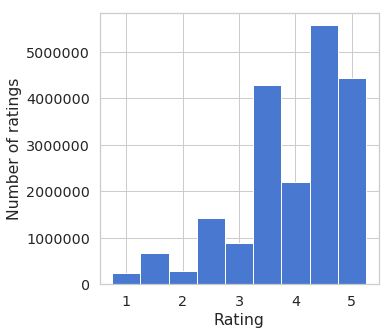

In [ ]:
print(ratings.rating.describe())
plt.figure(figsize=(5, 5))
plt.hist(ratings.rating, bins=9, align='right')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

count   26,744.000
mean       747.841
std      3,085.818
min          1.000
25%          3.000
50%         18.000
75%        205.000
max     67,310.000
Name: movie_id, dtype: float64


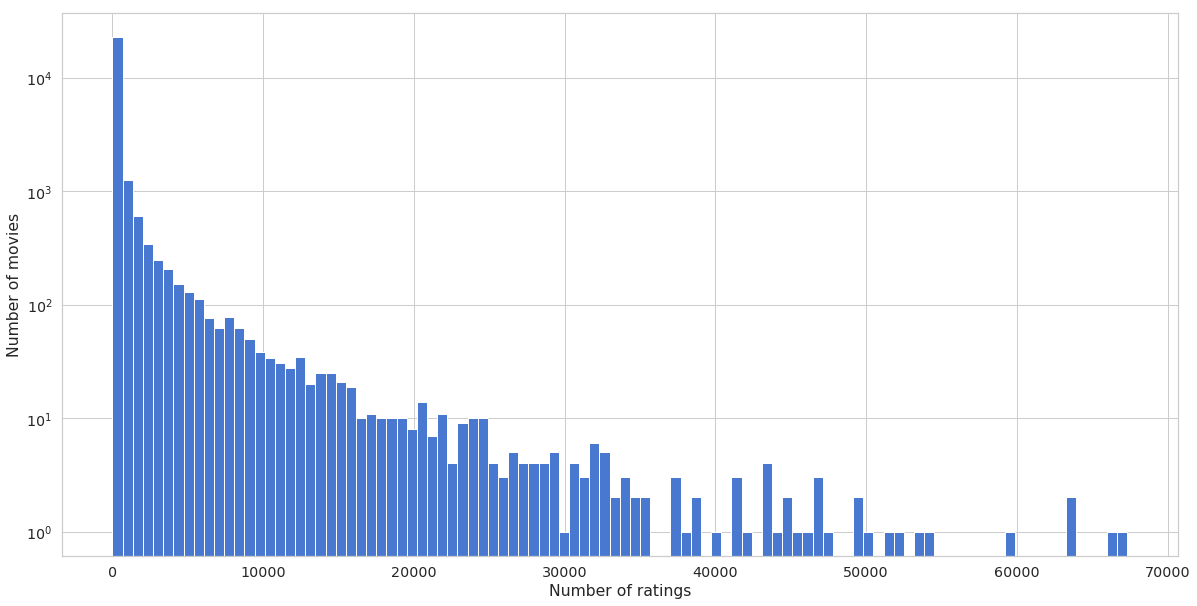

In [ ]:
n_ratings = ratings.groupby(['movie_id']).movie_id.count()
print(n_ratings.describe())
plt.figure(figsize=(20, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

count   138,493.000
mean        144.414
std         230.267
min          20.000
25%          35.000
50%          68.000
75%         155.000
max       9,254.000
Name: movie_id, dtype: float64


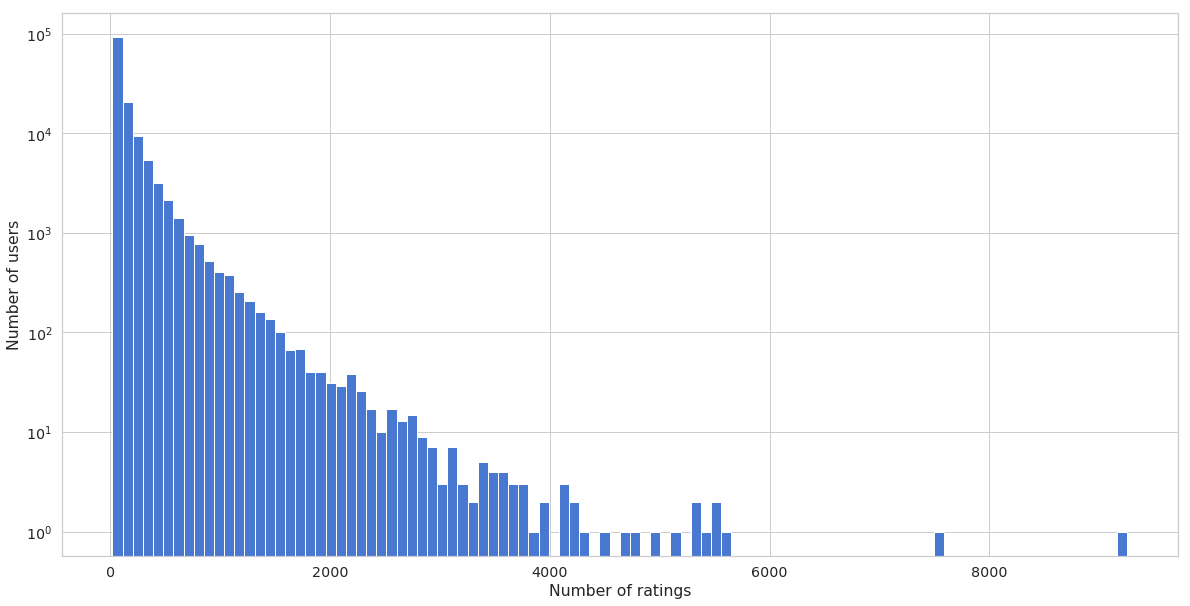

In [ ]:
n_ratings = ratings.groupby(['user_id']).movie_id.count()
print(n_ratings.describe())
plt.figure(figsize=(20, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

In [ ]:
ratings['year'] = ratings.timestamp.apply(lambda ts: datetime.datetime.fromtimestamp(ts).year)

In [ ]:
plt.figure(figsize=(20, 10))
years = ratings.year.dropna().astype(int).tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins, align='right')
plt.xlabel('Rating year')
plt.ylabel('Number of ratings')
plt.show()

In [ ]:
ratings.info()

In [ ]:
movies.to_csv('data/movies_clean.csv', index=False)
ratings.to_csv('data/ratings_clean.csv', index=False)

In [ ]:
ratings = ratings.sample(frac=1.0)
train_lim = int(0.8 * len(ratings))
ratings[:train_lim].to_csv('data/ratings_train.csv', index=False)
ratings[train_lim:].to_csv('data/ratings_test.csv', index=False)